# Machine Learning For Everyone
Lecture notes for HuStar Project by idebtor@gmail.com 
**************

# 제 5 강: 선형 회귀 2 $^{Linear Regression}$ 


## 학습 목표
    - 선형 회귀를 활용하여 기계 학습의 Workflow를 이해한다. 
    
## 학습 내용
    - 단순 선형 회귀(simple linear regression)
    - 다중 선형 회귀(multiple linear regression)
    - Training set vs Test set


This lesson is based on [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f).

There are two types of supervised machine learning algorithms: 
    - Regression
    - Classification

The regression predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

In this session, we will briefly study what linear regression is and how it can be implemented for both two variables and multiple variables using Scikit-Learn, which is one of the most popular machine learning libraries for Python.

# 단순 선형 회귀: Simple Linear Regression 

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value ($y$) based on a given independent variable ($x$). So, this regression technique finds out a linear relationship between $x$ (input) and $y$(output). Hence, the name is Linear Regression. If we plot the independent variable ($x$) on the x-axis and dependent variable ($y$) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically: 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/linear_reg1.png?raw=true" width="400">
<center>그림 1: 선형 회귀 모델 </center> 

[source](https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/)


The equation of the above line is : $y = wx + b$

> Where $b$ is the bias (or intercept) and $w$ is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the bias(b) and slope(w). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

\begin{align}
y = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + … … w_mx_m, \quad \text{where} \ x_0 = 1, \text{and} \ w_0 = b
\end{align}


This is the equation of a __hyperplane__. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a __hyperplane__.

In this session, we will see how Python’s Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables and then we will move towards linear regression involving multiple variables.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/linear_reg2.gif?raw=true" width="400">
<center>그림 2: 선형 회귀 </center> 

While exploring the Aerial Bombing Operations of World War Two dataset and recalling that the D-Day landings were nearly postponed due to poor weather, these weather reports may be downloaded from the period to compare with missions in the bombing operations dataset. 

You can download the dataset from [here](https://drive.google.com/open?id=1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1).

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.

So our task is to predict the maximum temperature taking input feature as the minimum temperature.

Let's start coding :

In [122]:
#Import all the required libraries :
    
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


The following command imports the CSV dataset using pandas:

In [123]:
dataset = pd.read_csv('./data/Weather.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [120]:
dataset.None

(119040, 31)

You should receive output as $(119040, 31)$, which means the data contains $119040$ rows and $31$ columns.
To see the statistical details of the dataset, we can use `describe()`:

In [121]:
dataset.None

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


And finally, let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script :

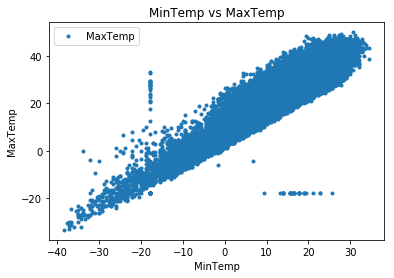

In [124]:
dataset.plot(x='MinTemp', y='MaxTemp', style='.')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.As it can be seen, the line we have here is not that bad, since only a few points lie very far from it, most of the points lie around the line itself.

- Visualizing the Test set results

We do this using the following code:


In [1]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title("Average maximum temperature which is between 25 and 35")
seabornInstance.distplot(dataset['MaxTemp'])

NameError: name 'plt' is not defined

Our next step is to divide the data into __attributes__ and __labels__.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the `MaxTemp` depending upon the `MinTemp` recorded. Therefore our attribute set will consist of the `MinTemp` column which is stored in the $X$ variable, and the label will be the `MaxTemp` column which is stored in $y$ variable.

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Next, we split __80%__ of the data to the training set while __20%__ of the data to test set using below code.

The `test_size` variable is where we actually specify the proportion of the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import `LinearRegression` class, instantiate it, and call the `fit()` method along with our training data.

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

The result should be approximately `10.66185201` and `0.92033997` respectively.

This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [ ]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for `X_test` with the predicted values, execute the following script:

In [ ]:
# comparison of Actual and Predicted value
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose we are taking just 25 records.

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

In [ ]:
# prediction vs test data
y_pred = regressor.predict(X_test)

plt.scatter(X_test, y_test,  color='gray', s = 2)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
\begin{align}
\mathbf{MAE} = \frac{1}{n} \sum_{j=1}^{n}|y_j - \hat{y}_j|
\end{align}

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

\begin{align}
\mathbf{MSE} = \frac{1}{N} \sum_{j=1}^{n}(y_j - \hat{y}_j)^2
\end{align}
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
\begin{align}
\mathbf{RMSE} = \sqrt{\frac{1}{n} \sum_{j=1}^{n}(y_j - \hat{y}_j)^2}
\end{align}

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

You should receive output like this (but probably slightly different):

```
('Mean Absolute Error:', 3.19932917837853)
('Mean Squared Error:', 17.631568097568447)
('Root Mean Squared Error:', 4.198996082109204)
```

You can see that the value of root mean squared error is $4.19$, which is more than 10% of the mean value of the percentages of all the temperature i.e. $22.41$. This means that our algorithm was not very accurate but can still make reasonably good prediction

### Some thoughts:
In this session, it uses about 120,000 data samples. 
- Do you think we have the data enough or too many? 
- Determine whether or not we can reduce the total number of data used.

# 다중 선형 회귀: Multiple Linear Regression 

A good introductory explanation is available from [here](https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c)

We just performed linear regression in the above section involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. __Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression__. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

A red wine quality dataset related to red variants of the Portuguese “Vinho Verde” wine is used in this session. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will predict the quality of the wine.

Now, let's start our coding :

In [ ]:
# import all the required libraries :

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

The following command imports the dataset from the file you downloaded via the link above:

In [ ]:
dataset = pd.read_csv('data/winequality.csv')

Let’s explore the data a little bit by checking the number of rows and columns in it.

In [ ]:
dataset.shape

It will give $(1599, 12)$ as output which means our dataset has $1599$ rows and $12$ columns.

To see the statistical details of the dataset, we can use describe():

In [ ]:
dataset.describe()

Let us clean our data little bit, So first check which are the columns the contains NaN values in it :

In [ ]:
dataset.isnull().any()

Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using below code.

In [ ]:
dataset = dataset.fillna(method='ffill')

Our next step is to divide the data into __attributes__ and __labels__. The variable $\mathbf{X}$ contains all the __attributes/features__ and $\mathbf{y}$ variable contains __labels__.

In [ ]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

Let's check the average value of the “quality” column.

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title("Average value of the quality of the wine")
seabornInstance.distplot(dataset['quality'])

As we can observe that most of the time the value is either 5 or 6.

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

As said earlier, in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

__A sample run:__
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/linear_reg3.png?raw=true" width="250">
<center>그림 3: 다중 회귀 모델이 선택한 최적인 계수들 </center> 


####  Debugging:
The [original code](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) has a bug in the following.  Why don't debug it?


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

> This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

Now let's do prediction on test data.

In [ ]:
y_pred = regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [ ]:
# Comparison between Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

Now let's plot the comparison of Actual and Predicted values

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Bar graph showing the difference between Actual and predicted value")
plt.show()


As we can observe here that our model has returned pretty good prediction results.
The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:

A sample run:
```
('Mean Absolute Error:', 0.46963309286611077)
('Mean Squared Error:', 0.38447119782012446)
('Root Mean Squared Error:', 0.6200574149384268)
```

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was __not very accurate__ but can still make __reasonably good__ predictions.

There are many factors that may have contributed to this inaccuracy, for example :

- __Need more data:__ We need to have a huge amount of data to get the best possible prediction.
- __Bad assumptions:__ We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- __Poor features:__ The features we used may not have had a high enough correlation to the values we were trying to predict.

## Conclusion

We studied the most fundamental machine learning algorithms i.e. linear regression. We implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library.

Most of this contents are from [KDnuggets article](https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html)

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_